# Import data from the web scraper

The webscraper provides immodata in the format described in this [example](Scraper-output.example).
Copy paste the immodate from the webconsole into the file [Scraper_file.txt](Scraper_file.txt), but make sure to seperate the entries from each other into a sequencial json-like list as shown in the [Scraper_file.txt](Scraper_file.txt).

The following cells can be used to make the data preperation, for the [database](Real-Estate-Database.json) used for analysis.

## Check the entries from the scraper file
Are the entries ready for computation? If not adjust the entries from the [Scraper_file.txt](Scraper_file.txt) so that they can be read as a JSON object.

In [104]:

import json

name      = [ "'", 'id:'  , 'price:'  , 'size:'  , 'rooms:',    'title:'  , 'link:'  , 'address:', 'description:']    # '\n', 
new_name  = [  '"', '"id":', '"price":', '"size":', '"rooms":', '"title":', '"link":', '"address":', '"description":'] #''  ,

with open('Scraper_file.txt', 'r') as file:
    data = file.read()
    for name, rename in zip(name, new_name):
        data = data.replace(name, rename)
d = json.loads(data)
#print(d)

To extract the *nummerical data* to use the data for plotting and other operations, you can use the code below to process the text based descriptions from the some entries like in:

``
  {
    id: 46309379,
    price: 'Verkehrswert 155.000 €',
    size: 'ca. 34.0 m²',
    title: '1-Zimmer-Wohnung mit Pkw-Stellplatz',
    address: 'Stuttgart Hedelfingen',
    link: 'https://www.immonet.de/angebot/46309379'
  },
``

Append the numerical data:

``
   {
        "id": 46309379,
        "price": "Verkehrswert 155.000 \u20ac",
        "size": "ca. 34.0 m\u00b2",
        "title": "1-Zimmer-Wohnung mit Pkw-Stellplatz",
        "address": "Stuttgart Hedelfingen",
        "link": "https://www.immonet.de/angebot/46309379",
        "price_num": 155000,
        "size_num": 34
    },
``


In [105]:
import re

price0 = [x["price"] for x in d]
#print (price0)

price1 = [x["price"].replace("(\d+)(.)(\d\d\d)(|,|.€|.+EUR)(.+)", "$1$3") for x in d]
#print(price1)


#test url: https://regex101.com/r/6zjEuc/1
price2 = [re.sub('(|.+?)(\d+)(\.)(\d\d\d)(|,|.€|.-|.+EUR)(.*$)|(Auf Anfrage)', '\g<2>\g<4>', x["price"]) for x in d]
#no price means "Auf Anfrage"

price = [int(p) if p != '' else 0 for p in price2]

#print(price)
print(len(price))

price3 = [re.sub('/\D+/g', '', x["price"]) for x in d]
#print(price2)

for idx,y in enumerate(zip(d,price)):
    d[idx]["price_num"] = price[idx]

print(json.dumps(d, indent=4))


28
[
    {
        "id": 131216815,
        "price": "175.000 \u20ac",
        "size": "60,34 m\u00b2",
        "title": "Panoramablick \u00fcber D\u00e4cher und Felder!!",
        "link": "https://www.immobilienscout24.de/expose/131216815",
        "address": "Haiterbach, Calw (Kreis)",
        "price_num": 175000
    },
    {
        "id": 131216670,
        "price": "239.999 \u20ac",
        "size": "57 m\u00b2",
        "title": "*NEU* Gem\u00fctliche 2,5-Zi-Maisonette-Wohnung in Pforzheim-Nordstadt",
        "link": "https://www.immobilienscout24.de/expose/131216670",
        "address": "Nordstadt, Pforzheim",
        "price_num": 239999
    },
    {
        "id": 131215238,
        "price": "228.000 \u20ac",
        "size": "59 m\u00b2",
        "title": "Gut aufgeteilte 2-Zimmer Wohnung mit sch\u00f6nem Blick in den Garten",
        "link": "https://www.immobilienscout24.de/expose/131215238",
        "address": "H\u00f6henstrasse 106, Wendlingen am Neckar, Esslingen (Kreis)",
  

Length of sizes:  28

With the counter and the histogram we check how the data quality is for the flat size! 
In this example we have a lot zero values: 

Counter({0: 6, 50: 3, 40: 2, 32: 2, 60: 1, 57: 1, 59: 1, 44: 1, 51: 1, 56: 1, 43: 1, 3: 1, 52: 1, 64: 1, 66: 1, 67: 1, 49: 1, 63: 1, 47: 1})


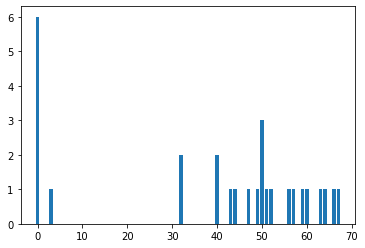

In [106]:
import re
#print(d[0]["size"] )

def check_size(x):
    try:
        if (x["size"] == '--- m²' or x["size"] == 'N/A m²') :
            return '0'
        else:
            return x["size"]
    except:
        return "0"


size0 = [ check_size(x) for x in d]
#print (size0)

size1 = [re.sub("(\D+?|N/A|)(\d+)(.*)", "\g<2>", check_size(x)) for x in d]
size = [int(s) for s in size1]


for idx,y in enumerate(zip(d,size)):
    d[idx]["size_num"] = size[idx]

#print(size)
print("Length of sizes: ",len(size))


from collections import Counter
from matplotlib import pyplot as plt

print("\nWith the counter and the histogram we check how the data quality is for the flat size! \nIn this example we have a lot zero values: \n")
myCounter = Counter(size)
print(myCounter)

plt.bar(myCounter.keys(), myCounter.values())
plt.show()


In [107]:
urls = [url["link"] for url in d]
#print(urls)
print("URLS: ",len(urls))

import uuid
def check_id(x):
    try:
        return x["id"]
    except:
        new_id = str(uuid.uuid4())# make a random UUID
        print("id missing! for entry: ", x ,"\n\nAdded new id: ", new_id, "\n")
        return new_id

def check_description(x):
    try:
        return x["description"]
    except:
        return "None"
    
def check_address(x):
    try:
        return x["address"]
    except:
        return "None"
    
ids = [check_id(x) for x in d]  
addresses = [check_address(x) for x in d]
descriptions = [check_description(x) for x in d]


#print(addresses)
print("addresses: ",len(addresses))

for idx,y in enumerate(zip(d,price)):
    d[idx]["address"] = addresses[idx]

#print(descriptions)
print("descriptions: ",len(descriptions))

for idx,y in enumerate(zip(d,descriptions)):
    d[idx]["description"] = descriptions[idx]

for idx,y in enumerate(zip(d,ids)):
    d[idx]["id"] = ids[idx]
print("ids: ",len(ids))



URLS:  28
addresses:  28
descriptions:  28
ids:  28


# Syncronize scraped data with the Databasefile

Here I add timestamps to the entries which have not been yet added to the database before!

In [122]:
def check_timestamp(x):
        try:
            return x["timestamp"] # If the scraper-file entry is already in the database return the Timestamp
        except:
            return str(pd.Timestamp.now())   # If the entry is not in the database yet use the current Time




with open('Real-Estate-Database.json', 'r') as db:
    database = db.read()
db = json.loads(database)


db_ids = [x["id"] for x in db]

new_entries_ids = list(set(ids) - set(db_ids))
print(len(new_entries_ids), " new entries identified: ")

new_entries = [x for x in d if x["id"] in new_entries_ids]

timestamps = [check_timestamp(x) for x in new_entries]

for idx,y in enumerate(zip(new_entries,timestamps)):
    new_entries[idx]["timestamp"] = timestamps[idx]


print(json.dumps(new_entries, indent=4))

print("Entries in Database" ,len(db))
db = db + new_entries
print("Entries in staged Database" ,len(db))


#timestamps = [check_timestamp(x, db) for x, db in ]



0  new entries identified: 
[]
Entries in Database 228
Entries in staged Database 228


# Save staged Entries 

Execute the following cell to write the data into the database.

In [123]:
print(json.dumps(db, indent=4))

with open('Real-Estate-Database.json', 'w') as outfile:
    json.dump(db, outfile)

[
    {
        "id": 6092487,
        "price": "155.000,00 EUR Verkehrswert",
        "size": "34,00\u00a0m\u00b2 Wohnfl\u00e4che / / 1 Zimmer",
        "rooms": " 1 Zimmer",
        "title": "Erdgeschosswohnung in 70329 Stuttgart, Heimgartenstr.",
        "link": "https://www.1a-immobilienmarkt.de/expose/6092487.html",
        "price_num": 155000,
        "size_num": 34,
        "address": "None",
        "description": "None",
        "timestamp": "2022-01-09 11:46:33.532016"
    },
    {
        "id": 5794567,
        "price": "245.000,00 EUR Kaufpreis",
        "size": "34,00\u00a0m\u00b2 Wohnfl\u00e4che / / 1 Zimmer",
        "rooms": " 1 Zimmer",
        "title": "WEITBLICK: Auf in die Zukunft! - 245.000,00 EUR Kaufpreis, ca. 34,00 m\u00b2&nbs ...",
        "link": "https://www.1a-immobilienmarkt.de/expose/5794567.html",
        "price_num": 245000,
        "size_num": 34,
        "address": "None",
        "description": "None",
        "timestamp": "2022-01-09 11:46:33.532506"

# Plot the Data from the Database

In [121]:
import pandas as pd
import plotly.graph_objs as go
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

with open('Real-Estate-Database.json', 'r') as db:
    database = db.read()
db = json.loads(database)


df = pd.DataFrame({"Size": [x["size_num"] for x in db],
                  "Price": [x["price_num"] for x in db],
                  "description": [x["description"] for x in db],
                  "address": [x["address"] for x in db],
                  "text":  ["<a href=\"{}\">{}</a>".format(url["link"],"o") for url in db],
                  "title": [x["title"] for x in db]
                  }
                 )


import plotly.express as px


fig = px.scatter(df, x="Size", y="Price", text=df["text"], 
                 trendline="ols", 
                 hover_name="title", 
                 hover_data=["description", "address"]
                )
fig.show()